<a href="https://colab.research.google.com/github/le11nguyen/AIO-Exercise/blob/main/M5W1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt

from sklearn . model_selection import train_test_split
from sklearn . preprocessing import StandardScaler

In [2]:
dataset_path = '/content/Titanic Modified Dataset.csv'
df = pd. read_csv (
    dataset_path ,
    index_col ='PassengerId' )

In [4]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


In [5]:
dataset_arr = df. to_numpy () . astype (np. float64 )
X, y = dataset_arr [: , : -1] , dataset_arr [: , -1]

In [6]:
intercept = np. ones ((X. shape [0] , 1))
X_b = np. concatenate (( intercept , X) ,axis =1)

In [7]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train , X_val , y_train , y_val = train_test_split (
    X_b , y,
    test_size = val_size ,
    random_state = random_state ,
    shuffle = is_shuffle
    )

X_train , X_test , y_train , y_test = train_test_split (
    X_train , y_train ,
    test_size = test_size ,
    random_state = random_state ,
    shuffle = is_shuffle
    )

In [8]:
normalizer = StandardScaler ()
X_train [: , 1:] = normalizer . fit_transform ( X_train [: , 1:])
X_val [: , 1:] = normalizer . transform ( X_val [: , 1:])
X_test [: , 1:] = normalizer . transform ( X_test [: , 1:])

In [9]:
def sigmoid (z) :
  return 1 / (1 + np. exp ( -z) )

In [10]:
def predict (X, theta ) :
  dot_product = np. dot (X, theta )
  y_hat = sigmoid ( dot_product )
  return y_hat

In [12]:
def compute_loss (y_hat , y) :
  y_hat = np. clip (
      y_hat , 0.0000001 , 1 - 0.0000001)

  return (
      -y * \
      np. log ( y_hat ) - (1 - y) * \
      np. log (1 - y_hat )
      ) . mean ()

In [13]:
def compute_gradient (X, y, y_hat ) :
  return np.dot(
      X.T, ( y_hat - y)
      ) / y. size

In [14]:
def update_theta (theta , gradient , lr) :
  return theta - lr * gradient

In [15]:
def compute_accuracy (X, y, theta ) :
  y_hat = predict (X, theta ) . round ()
  acc = ( y_hat == y) . mean ()
  return acc

In [17]:
lr = 0.01
epochs = 100
batch_size = 16

np. random . seed ( random_state )
theta = np. random . uniform (size = X_train . shape [1])

In [24]:

train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
  train_batch_losses = []
  train_batch_accs = []
  val_batch_losses = []
  val_batch_accs = []

  for i in range(0, X_train.shape[0], batch_size):
    X_i = X_train[i:i+batch_size]
    y_i = y_train[i:i+batch_size]

    y_hat = predict(X_i, theta)

    train_loss = compute_loss(y_hat, y_i)

    gradient = compute_gradient(X_i, y_i, y_hat)

    theta = update_theta(theta, gradient, lr)


    train_batch_losses.append(train_loss)

    train_acc = compute_accuracy(X_train, y_train, theta)
    train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

  train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
  val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
  train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
  val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

  train_losses.append(train_batch_loss)
  val_losses.append(val_batch_loss)
  train_accs.append(train_batch_acc)
  val_accs.append(val_batch_acc)

  print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')



EPOCH 1:	Training loss: 0.640	Validation loss: 0.567

EPOCH 2:	Training loss: 0.614	Validation loss: 0.555

EPOCH 3:	Training loss: 0.592	Validation loss: 0.544

EPOCH 4:	Training loss: 0.572	Validation loss: 0.535

EPOCH 5:	Training loss: 0.554	Validation loss: 0.528

EPOCH 6:	Training loss: 0.539	Validation loss: 0.522

EPOCH 7:	Training loss: 0.526	Validation loss: 0.517

EPOCH 8:	Training loss: 0.514	Validation loss: 0.513

EPOCH 9:	Training loss: 0.504	Validation loss: 0.509

EPOCH 10:	Training loss: 0.495	Validation loss: 0.507

EPOCH 11:	Training loss: 0.487	Validation loss: 0.505

EPOCH 12:	Training loss: 0.480	Validation loss: 0.503

EPOCH 13:	Training loss: 0.474	Validation loss: 0.502

EPOCH 14:	Training loss: 0.468	Validation loss: 0.501

EPOCH 15:	Training loss: 0.463	Validation loss: 0.500

EPOCH 16:	Training loss: 0.459	Validation loss: 0.500

EPOCH 17:	Training loss: 0.455	Validation loss: 0.500

EPOCH 18:	Training loss: 0.452	Validation loss: 0.500

EPOCH 19:	Training

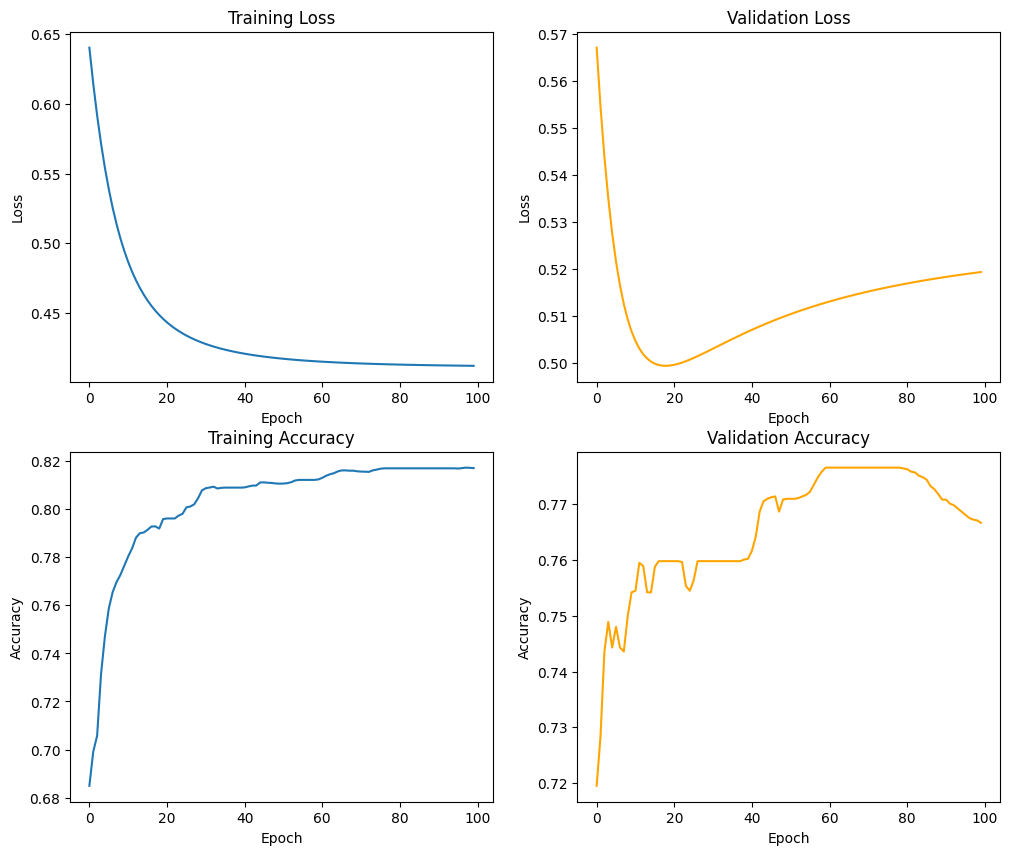

In [25]:
fig , ax = plt . subplots (2 , 2 , figsize =(12 , 10) )
ax [0 , 0]. plot ( train_losses )
ax [0 , 0]. set ( xlabel = 'Epoch' , ylabel ='Loss' )
ax [0 , 0]. set_title ('Training Loss')

ax [0 , 1]. plot ( val_losses , 'orange')
ax [0 , 1]. set ( xlabel = 'Epoch', ylabel = 'Loss' )
ax [0 , 1]. set_title ('Validation Loss')

ax [1 , 0]. plot ( train_accs )
ax [1 , 0]. set ( xlabel ='Epoch', ylabel ='Accuracy' )
ax [1 , 0]. set_title ('Training Accuracy')

ax [1 , 1]. plot ( val_accs , 'orange')
ax [1 , 1]. set ( xlabel ='Epoch', ylabel ='Accuracy' )
ax [1 , 1]. set_title ('Validation Accuracy')

plt . show ()

In [27]:
val_set_acc = compute_accuracy (X_val , y_val , theta )
test_set_acc = compute_accuracy ( X_test , y_test , theta )
print ('Evaluation on validation and test set :')
print (f'Accuracy : { val_set_acc }')
print (f'Accuracy : { test_set_acc }')

Evaluation on validation and test set :
Accuracy : 0.770949720670391
Accuracy : 0.7752808988764045


# **TWITTER SENTIMENT ANALYSIS**

In [28]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib . pyplot as plt

from sklearn . model_selection import train_test_split
from sklearn . preprocessing import StandardScaler
from nltk . tokenize import TweetTokenizer
from collections import defaultdict

In [29]:
dataset_path = '/content/Sentiment Analysis.csv'
df = pd. read_csv (
    dataset_path ,
    index_col ='id'
    )

In [30]:
df.head()

,label,tweet
id,,
1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
2,0,Finally a transparant silicon case ^^ Thanks t...
3,0,We love this! Would you go? #talk #makememorie...
4,0,I'm wired I know I'm George I was made that wa...
5,1,What amazing service! Apple won't even talk to...


In [44]:
def text_normalize(text):
    # Retweet old acronym "RT" removal
    text = re.sub(r'^RT[\s]+', '', text)

    # Hyperlinks removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

     # Punctuation removal
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokenizer = TweetTokenizer(
        preserve_case=False,
        strip_handles=True,
        reduce_len=True
    )
    text_tokens = tokenizer.tokenize(text)

    return text_tokens

In [45]:
text = """We love this! Would you go?
#talk #makememories #unplug
 #relax #iphone #smartphone #wifi #connect...
http://fb.me/6N3LsUpCu
"""
text = text_normalize(text)
text

['we',
 'love',
 'this',
 'would',
 'you',
 'go',
 'talk',
 'makememories',
 'unplug',
 'relax',
 'iphone',
 'smartphone',
 'wifi',
 'connect']

In [46]:
def get_freqs (df) :
  freqs = defaultdict ( lambda : 0)
  for idx , row in df. iterrows () :
    tweet = row ['tweet']
    label = row ['label']
    tokens = text_normalize ( tweet )
    for token in tokens :
      pair = (token , label )
      freqs [ pair ] += 1
  return freqs

In [47]:
def get_feature (text , freqs ) :
  tokens = text_normalize ( text )
  X = np. zeros (3)
  X[0] = 1
  for token in tokens :
    X[1] += freqs [( token , 0) ]
    X[2] += freqs [( token , 1) ]
  return X


In [48]:
X = []
y = []

freqs = get_freqs (df)
for idx , row in df. iterrows () :
  tweet = row ['tweet']
  label = row ['label']
  X_i = get_feature (tweet , freqs )
  X. append (X_i)
  y. append ( label )

X = np. array (X)
y = np. array (y)

In [49]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train , X_val , y_train , y_val = train_test_split (
  X, y,
  test_size = val_size ,
  random_state = random_state ,
  shuffle = is_shuffle
  )

X_train , X_test , y_train , y_test = train_test_split (
  X_train , y_train ,
  test_size = test_size ,
  random_state = random_state ,
  shuffle = is_shuffle)

In [50]:
normalizer = StandardScaler ()
X_train [: , 1:] = normalizer . fit_transform ( X_train [: , 1:])
X_val [: , 1:] = normalizer . transform ( X_val [: , 1:])
X_test [: , 1:] = normalizer . transform ( X_test [: , 1:])

In [51]:
def sigmoid (z) :
  return 1 / (1 + np. exp ( -z) )

def compute_loss (y_hat , y) :
  y_hat = np. clip (
      y_hat , 0.00000001 , 1 - 0.00000001)
  return ( -y * np.log ( y_hat ) - (1 - y) * np. log (1 - y_hat ) ) . mean ()

def predict (X, theta ) :
  dot_product = np. dot (X, theta )
  y_hat = sigmoid ( dot_product )
  return y_hat

def compute_gradient (X, y, y_hat ) :
  return np.dot(X.T, ( y_hat - y)) / y. size

def update_theta (theta , gradient , lr) :
  return theta - lr * gradient

def compute_accuracy (X, y, theta ) :
  y_hat = predict (X, theta ) . round ()
  acc = ( y_hat == y) . mean ()
  return acc

In [52]:
lr = 0.01
epochs = 200
batch_size = 128

np. random . seed ( random_state )
theta = np. random . uniform (size = X_train . shape [1])

In [53]:

train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
  train_batch_losses = []
  train_batch_accs = []
  val_batch_losses = []
  val_batch_accs = []

  for i in range(0, X_train.shape[0], batch_size):
    X_i = X_train[i:i+batch_size]
    y_i = y_train[i:i+batch_size]

    y_hat = predict(X_i, theta)

    train_loss = compute_loss(y_hat, y_i)

    gradient = compute_gradient(X_i, y_i, y_hat)

    theta = update_theta(theta, gradient, lr)


    train_batch_losses.append(train_loss)

    train_acc = compute_accuracy(X_train, y_train, theta)
    train_batch_accs.append(train_acc)

    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(X_val, y_val, theta)
    val_batch_accs.append(val_acc)

  train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
  val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
  train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
  val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

  train_losses.append(train_batch_loss)
  val_losses.append(val_batch_loss)
  train_accs.append(train_batch_acc)
  val_accs.append(val_batch_acc)

  print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')



EPOCH 1:	Training loss: 0.707	Validation loss: 0.704

EPOCH 2:	Training loss: 0.661	Validation loss: 0.659

EPOCH 3:	Training loss: 0.624	Validation loss: 0.622

EPOCH 4:	Training loss: 0.594	Validation loss: 0.591

EPOCH 5:	Training loss: 0.569	Validation loss: 0.566

EPOCH 6:	Training loss: 0.548	Validation loss: 0.546

EPOCH 7:	Training loss: 0.531	Validation loss: 0.528

EPOCH 8:	Training loss: 0.516	Validation loss: 0.514

EPOCH 9:	Training loss: 0.504	Validation loss: 0.502

EPOCH 10:	Training loss: 0.494	Validation loss: 0.491

EPOCH 11:	Training loss: 0.485	Validation loss: 0.483

EPOCH 12:	Training loss: 0.477	Validation loss: 0.475

EPOCH 13:	Training loss: 0.471	Validation loss: 0.468

EPOCH 14:	Training loss: 0.465	Validation loss: 0.463

EPOCH 15:	Training loss: 0.460	Validation loss: 0.457

EPOCH 16:	Training loss: 0.456	Validation loss: 0.453

EPOCH 17:	Training loss: 0.452	Validation loss: 0.449

EPOCH 18:	Training loss: 0.448	Validation loss: 0.445

EPOCH 19:	Training

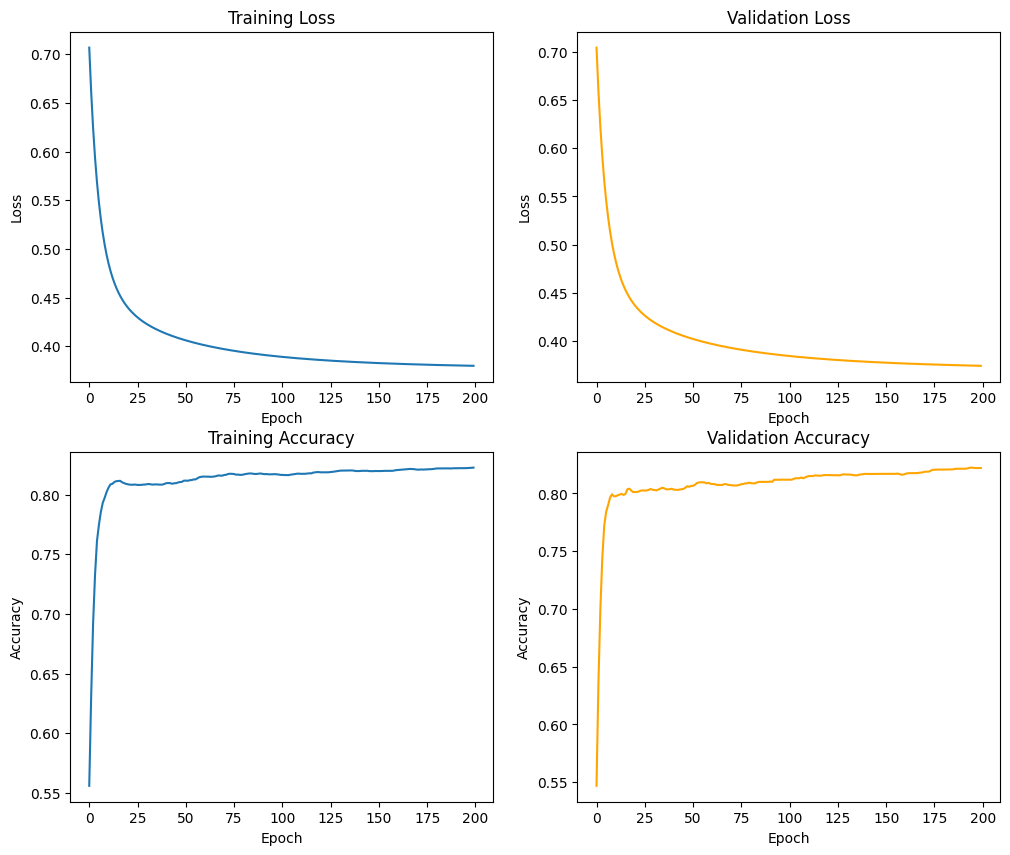

In [54]:
fig , ax = plt . subplots (2 , 2 , figsize =(12 , 10) )
ax [0 , 0]. plot ( train_losses )
ax [0 , 0]. set ( xlabel = 'Epoch' , ylabel ='Loss' )
ax [0 , 0]. set_title ('Training Loss')

ax [0 , 1]. plot ( val_losses , 'orange')
ax [0 , 1]. set ( xlabel = 'Epoch', ylabel = 'Loss' )
ax [0 , 1]. set_title ('Validation Loss')

ax [1 , 0]. plot ( train_accs )
ax [1 , 0]. set ( xlabel ='Epoch', ylabel ='Accuracy' )
ax [1 , 0]. set_title ('Training Accuracy')

ax [1 , 1]. plot ( val_accs , 'orange')
ax [1 , 1]. set ( xlabel ='Epoch', ylabel ='Accuracy' )
ax [1 , 1]. set_title ('Validation Accuracy')

plt . show ()

In [55]:
val_set_acc = compute_accuracy (X_val , y_val , theta )
test_set_acc = compute_accuracy ( X_test , y_test , theta )
print ('Evaluation on validation and test set :')
print (f'Accuracy : { val_set_acc }')
print (f'Accuracy : { test_set_acc }')

Evaluation on validation and test set :
Accuracy : 0.821969696969697
Accuracy : 0.8434343434343434
